In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [17]:
# 1. Load the MNIST dataset
# The dataset is already split into train and test sets by Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()




In [18]:
# 2. Preprocess the data
# Normalize pixel values to be between 0 and 1 (standard practice for neural networks)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0



# **Part** A

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8453 - loss: 0.5444 - val_accuracy: 0.9379 - val_loss: 0.2026
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9445 - loss: 0.1897 - val_accuracy: 0.9524 - val_loss: 0.1568
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9601 - loss: 0.1365 - val_accuracy: 0.9598 - val_loss: 0.1367
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1078 - val_accuracy: 0.9630 - val_loss: 0.1181
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0915 - val_accuracy: 0.9667 - val_loss: 0.1124
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0776 - val_accuracy: 0.9679 - val_loss: 0.1112
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9686 - val_loss: 0.1030
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0616 - 

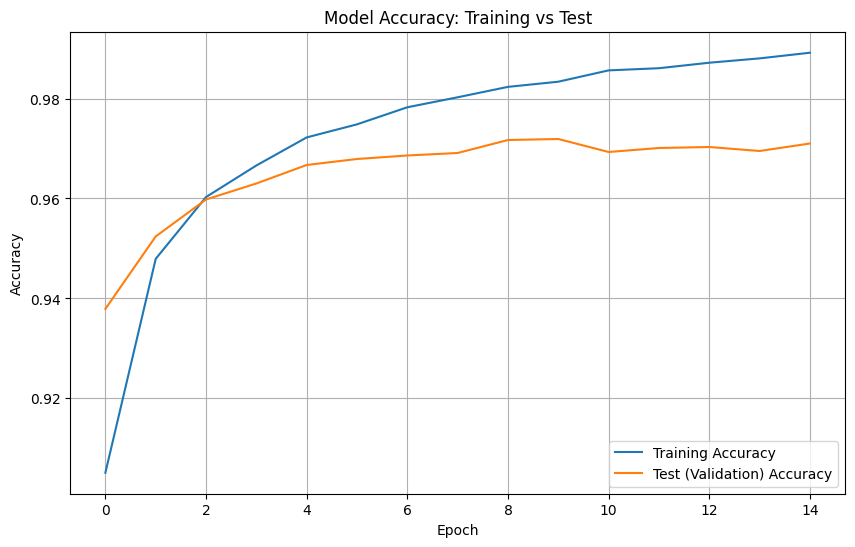

Final Test Accuracy: 97.10%

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,432 (372.79 KB)

 Trainable params: 31,810 (124.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,622 (248.53 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
# 3. Define the Model Architecture
# Constraint: Input (784) -> Hidden (10 neurons, ReLU) -> Output (10 neurons, Softmax)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flattens 28x28 images into 784 vector
    keras.layers.Dense(40, activation='relu'),  # Hidden layer with 40 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
# We use a validation_split or pass validation_data to track test accuracy during training
history = model.history = model.fit(X_train, y_train,
                                    epochs=15,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# 6. Plotting Accuracy vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Accuracy')
plt.title('Model Accuracy: Training vs Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Evaluate Final Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Display model parameters and classification report
print("\nModel Summary:")
model.summary()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **Part B**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7917 - loss: 0.6905 - val_accuracy: 0.9354 - val_loss: 0.2153
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.2193 - val_accuracy: 0.9441 - val_loss: 0.1872
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9463 - loss: 0.1819 - val_accuracy: 0.9474 - val_loss: 0.1767
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9532 - loss: 0.1598 - val_accuracy: 0.9515 - val_loss: 0.1615
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9599 - loss: 0.1383 - val_accuracy: 0.9536 - val_loss: 0.1581
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9616 - loss: 0.1310 - val_accuracy: 0.9552 - val_loss: 0.1517
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9639 - loss: 0.1235 - val_accuracy: 0.9561 - val_loss: 0.1475
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1129 - 

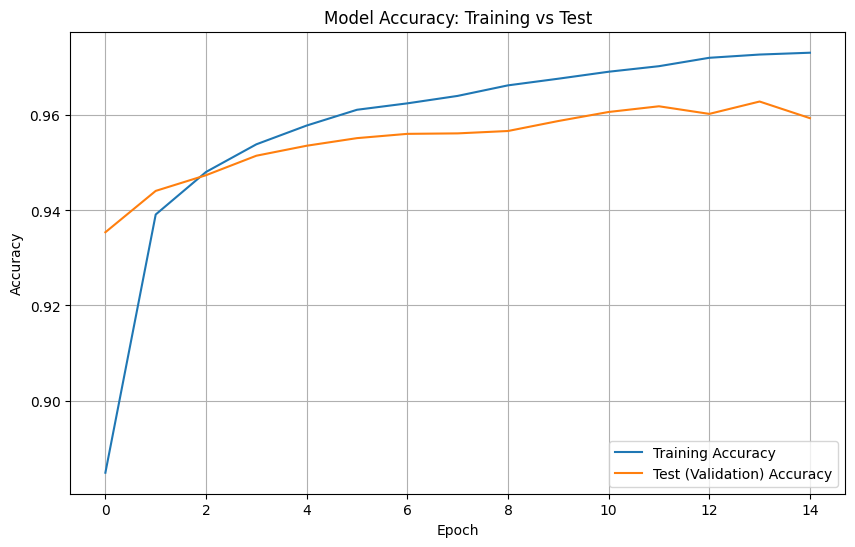

Final Test Accuracy: 95.94%

Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,992 (191.38 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,662 (127.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.93      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.97      0.96      0.97       958
           7       0.98      0.94      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [30]:
# 3. Define the Model Architecture
# Constraint: Input (784) -> Hidden (10 neurons, ReLU) -> Output (10 neurons, Softmax)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flattens 28x28 images into 784 vector
    keras.layers.Dense(20, activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(20, activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 5. Train the Model
# We use a validation_split or pass validation_data to track test accuracy during training
history = model.history = model.fit(X_train, y_train,
                                    epochs=15,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# 6. Plotting Accuracy vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Accuracy')
plt.title('Model Accuracy: Training vs Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Evaluate Final Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Display model parameters and classification report
print("\nModel Summary:")
model.summary()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **Part C**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8009 - loss: 0.6504 - val_accuracy: 0.9413 - val_loss: 0.2007
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9417 - loss: 0.1977 - val_accuracy: 0.9411 - val_loss: 0.2007
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9559 - loss: 0.1459 - val_accuracy: 0.9548 - val_loss: 0.1511
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9636 - loss: 0.1215 - val_accuracy: 0.9579 - val_loss: 0.1371
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1106 - val_accuracy: 0.9611 - val_loss: 0.1322
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.0983 - val_accuracy: 0.9598 - val_loss: 0.1361
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9716 - loss: 0.0898 - val_accuracy: 0.9631 - val_loss: 0.1246
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0811 - 

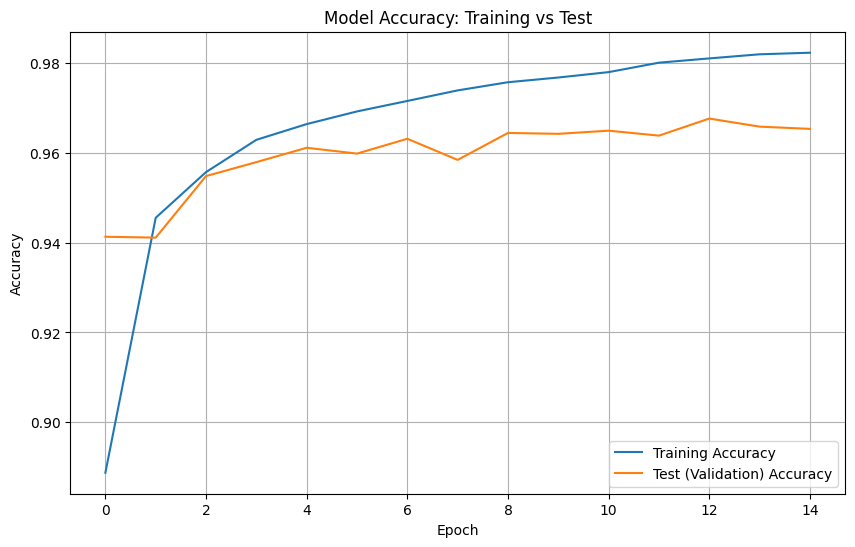

Final Test Accuracy: 96.53%

Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,262 (297.90 KB)

 Trainable params: 25,420 (99.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,842 (198.61 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.90      0.97      0.94       892
           6       0.96      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.97      0.96     10000
weighted avg       0.97      0.97      0.97     10000



In [31]:
# 3. Define the Model Architecture
# Constraint: Input (784) -> Hidden (10 neurons, ReLU) -> Output (10 neurons, Softmax)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flattens 28x28 images into 784 vector
    keras.layers.Dense(30, activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(20, activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(40, activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 5. Train the Model
# We use a validation_split or pass validation_data to track test accuracy during training
history = model.history = model.fit(X_train, y_train,
                                    epochs=15,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# 6. Plotting Accuracy vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Accuracy')
plt.title('Model Accuracy: Training vs Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Evaluate Final Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Display model parameters and classification report
print("\nModel Summary:")
model.summary()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **Part D**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4948 - loss: 1.6027 - val_accuracy: 0.8921 - val_loss: 0.4713
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9016 - loss: 0.3925 - val_accuracy: 0.9302 - val_loss: 0.2655
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.2460 - val_accuracy: 0.9438 - val_loss: 0.2087
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9472 - loss: 0.1891 - val_accuracy: 0.9505 - val_loss: 0.1806
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9557 - loss: 0.1570 - val_accuracy: 0.9533 - val_loss: 0.1719
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1368 - val_accuracy: 0.9541 - val_loss: 0.1623
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9671 - loss: 0.1168 - val_accuracy: 0.9570 - val_loss: 0.1521
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9686 - loss: 0.1086 - 

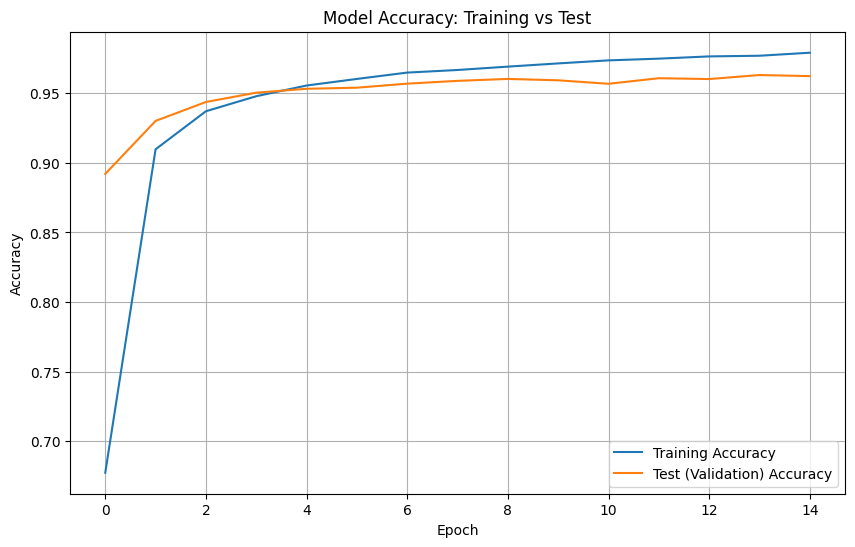

Final Test Accuracy: 96.24%

Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,262 (297.90 KB)

 Trainable params: 25,420 (99.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,842 (198.61 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.95      0.95       892
           6       0.98      0.97      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [32]:
# 3. Define the Model Architecture
# Constraint: Input (784) -> Hidden (10 neurons, ReLU) -> Output (10 neurons, Softmax)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flattens 28x28 images into 784 vector
    keras.layers.Dense(30, activation='sigmoid'),  # Hidden layer with 10 neurons
    keras.layers.Dense(20, activation='sigmoid'),  # Hidden layer with 10 neurons
    keras.layers.Dense(40, activation='sigmoid'),  # Hidden layer with 10 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 5. Train the Model
# We use a validation_split or pass validation_data to track test accuracy during training
history = model.history = model.fit(X_train, y_train,
                                    epochs=15,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# 6. Plotting Accuracy vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Accuracy')
plt.title('Model Accuracy: Training vs Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Evaluate Final Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Display model parameters and classification report
print("\nModel Summary:")
model.summary()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))